We want to reimagine the blog authoring experience powered by AI. Our objective is to augment blog authoring activities with AI so that the blog author can save time authoring posts, enable more "creative focus" for the author, increase "flow" for the author leading to publishing more posts as a result, and ultimately leading to more eyeballs and monetization benefits. 

Today with the launch of ChatGPT from OpenAI entire blog posts can be generated by an AI. The challenge with this approach is that the human author involvement is negligible. We want to take the best of human-AI partnership approach with PromptxAI. We want AI to augment the authoring process guided by human author opinions, enhancing creative focus, and increasing authoring flow.

That is why we created this notebook. We want to share our journey in creating a Python library PromptxAI Blogger which can be used for "human and AI in partnership for low-code blog authoring automation". We are sharing this notebook in a tutorial style so that others can join the exploration. The tutorial walks through basics of API design and OpenAI. Another objective of this notebook is to act as an interactive documentation and playground for the PromptxAI library.

## Authoring Flow

The flow we are expecting to achieve with PromptxAI Blogger API is as follows:
Ideate => Research (Topic) => Write (Title, Tags) => Enhance (Q&A, Quote) => Illustrate (Feature Image) => Publish
1. **Ideate:** AI combines concepts human provides and generates blog post ideas. Human selects the best idea
3. **Research:** AI generates topic description based on the idea. Human iterates few variations of topic descriptions generated and choose the most appropriate
4. **Write:** This step involves AI helping identify an SEO friendly title for the post and tags based on the topic. AI could further help in grammar correction, research, generating code, and other activities, which are not included in current scope.
5. **Enhance:** We can further enhance the blog post with Fequently Asked Questions, Leaderboard, and Quotable Quotes also generated by AI.
6. **Illustrate:** We are then ready to generate custom illustrations or imagery for our post using AI. This we believe is the coolest part of the process!
7. **Publish:** We are automating the post publishing by generating HTML and Markdown. AI could help further by generating layout templates, code for value added micro-apps for the blog post like a custom chatbot, and so on. This is not in scope at the moment.


## Structure of this Notebook
We have built the Blogger API with somewhat opinionated defaults (e.g., generate tags as only single word nouns) to make the API usage as intuitive as possible and keep it low code. This also enables automation using single call the API to generate an entire blog post. The notebook tests this API out on an example. We have purposely created the notebook with default options simulating the human opinions so that you can run the example 100% using the AI and simulation. This exhibits AI's current state of the art and encourages debate around what is the evolved role of an author if AI can automate to this extent. This notebook demonstrates creation of a relatively complex blog post with title, subtitle, tags, topic content, feature image, questions and answers, quotable quote, and leaderboard of top X entities, in HTML and Markdown formats using only 11 API calls, almost one API call per blog feature.

The paradox this presents is the unfortunate possibility of misuse, where AI can be used to generate "realistic" blogs which seem to be human written. It is somewhat "addictive" to re-run the notebook several times to see what unique variations does the AI generate with only three simple words (or fewer, or more) as seed input! Can the reader think of ways this automation can be put to good use - like an **exploratory online education** or an **infinite digital museum** or **visual search results**?

## Blogger API
Let us introduce the Blogger API. We start with choice of dependencies or technologies which enable Blogger API. We use [OpenAI](https://openai.com/) as the "brains" of Blogger API. Specifically, we use GPT3 Large Language Model which powers the famous ChatGPT. Next we import a few utility libraries to perform file operations and cleanup of results. Finally we rely on libraries for image, HTML, and markdown.

In [3]:
from promptxai import blogger

### No-code Auto Generation
We start with a "no-code" demo of the API where we generate the entire blog post with a single API call. The post image and html file will be stored in the same folder as this notebook.

In [4]:
keywords = 'Mars, Earth, Travel'
image_file, html_file, md_file = blogger.auto_generate(keywords=keywords, verbose=True, folder='generated')
print('Auto Generated image: ', image_file)
print('Auto Generated html: ', html_file)
print('Auto Generated markdown: ', md_file)

1. Interplanetary Travel between Earth and Mars
2. Mars Exploration Tours from Earth
3. Simulated Mars Travel Experiences on Earth
4. Rover Exchanges between Earth and Mars
5. Telescopic Viewing of Mars from Earth
6. Earth-Mars Exchange Programs for Scientists
7. Mars Habitat Builds on Earth
8. Interplanetary Cultural Exchange Programs
9. Earth-Mars Joint Space Research Projects
10. Mars Tourism Packages from Earth
Earth-Mars Joint Space Research Projects
The joint Earth-Mars space research projects have been ongoing for over a decade, and have yielded some incredible scientific advances. Both our planets have seen the benefits of improved communication, collaboration and the development of new technologies that have helped us better understand the universe we live in. 

One of the most exciting projects to date is the Mars Exploration Rover. Working together, scientists from Earth and from Mars have been able to send a spacecraft to the Red Planet to explore its surface and atmosphere

### Low-code Authoring Flow
This section demonstrates the authoring flow enabled by PromptxAI API. We start by initializing a post object from the BlogPost class. We will use this to store completions returned by our authoring flow and publish the post in the end of this demo.

In [5]:
post = blogger.BlogPost()

In [6]:
post.set_keywords(keywords)

Set `auto` value to `True` when using AI for auto generating the entire blog without any human author partnership. This adds a disclaimer on top of the generated HTML that this is an AI generated page.

In [7]:
post.set_auto(True)

Set this `full_feature` value to `True` when generating blog post layout with full feature 1024x1024 image. Otherwise the feature image is 356x356 left aligned to topic text.

In [8]:
post.set_full_feature(False)

### Ideate
To begin our authoring flow, we first start by brainstorming 10 ideas based on few concepts we are thinking for our next blog post. As we are using high value for `temperature` parameter by default, we can re-run this API (notebook cell) and evaluate creative variations of completion results, before we pick the best one for continuing our authoring flow. We have noticed that three concepts which are seemingly unrelated or somewhat related generate more creative ideas than two concepts which are more related.

In [10]:
response, response_list = blogger.ideas(post.get_keywords())
print(response)

1. Interplanetary travel between Mars and Earth
2. Human colonization of Mars and Earth
3. Developing rockets for faster interplanetary travel
4. Robots with 3D-printed parts to explore both Mars and Earth
5. Constructing a space station between Mars and Earth
6. Developing new space suits to explore both Mars and Earth
7. Creating an interplanetary currency payment system
8. Planning for a joint Mars-Earth research mission
9. Designing and launching satellites for communication between Mars and Earth
10. Developing a plan for long-term research and development projects between Earth and Mars


Next we select one of the ideas we like and save this in our post object. Just replace the `randrange(len(response_list)-1)` random number generator placeholder for auto-demo with an integer from 0-9, noting that Python list numbering starts with 0 so relates to 1 in the completion result list, 1 is 2, and so on.

In [11]:
post.set_concept(response_list[3])
print(post.get_concept())

Robots with 3D-printed parts to explore both Mars and Earth


### Research
Now we are ready to use GPT3 as a research tool. We can research the idea we just selected and describe it as a topic for our blog post. Note the token limits described in prior section. You can experiment with words to settle on a variation that satisfies your blog content length and audience. 
> Future releases of the PromptxAI API will introduce editing features so that you can edit and add your own content as well as use the AI to auto-complete partial edits.

In [13]:
topic = blogger.elaborate(post.get_concept(), words=200)
post.set_topic(topic)
print(post.get_topic())

Robots with 3D-printed parts are quickly becoming an invaluable tool for exploring both Mars and Earth. 3D-printed parts, also known as additive manufacturing, provide a whole host of benefits not found in traditional manufacturing methods, including ease of production and lightweight materials. Additionally, they are much more affordable than other manufacturing techniques and can be used to make complex shapes and structures.

This flexibility has been key to robotic exploration of both Mars and Earth. On Mars, 3D-printed robot parts have been used to explore the planet's surface with unprecedented detail, allowing researchers to map out terrain and collect samples with greater precision. On Earth, 3D-printed parts have enabled robots to explore and investigate areas that would otherwise have been too dangerous or treacherous for human exploration.

In addition to exploration, 3D-printed parts have also allowed robots to complete tasks that would normally require intense manual labor

### Write
Next step in the authoring flow is to take the topic we described above and generate catchy, SEO friendly titles for our blog post. Note the difference between ideas generated and post titles. All the magic is in the prompt engineering.

In [16]:
response, response_list = blogger.titles(post.get_topic())
print(response)

1. Unlocking the Secrets of Mars & Earth: Exploring with 3D-Printed Parts
3. Exploring Our World & Beyond: The Benefits of 3D Printing for Robotics
4. Robots Exploring Where Humans Cannot: 3D-Printed Parts in Mars & Earth Exploration
5. Uncovering the Unknown: Robot Exploration with 3D-Printed Parts
6. Beyond Human Capabilities: Using 3D-Printed Parts to Explore Mars & Earth
7. Pioneering Exploration: 3D-Printed Parts Enabling Robot Progress
8. Exploring New Depths: Robots and 3D-Printed Parts in Mars & Earth Exploration
9. Far-Reaching Possibilities: 3D-Printed Parts Revolutionizing Robot Exploration
10. Unlock your Exploration Potential: 3D-Printed Parts and Robot Exploration of Mars & Earth


You can replace the `randrange` random generator with a number to choose your title.

In [17]:
post.set_title(response_list[5])
print(post.get_title())

Pioneering Exploration: 3D-Printed Parts Enabling Robot Progress


Same way we can also generate tags from the topic.

In [18]:
response, response_list = blogger.tags(post.get_topic())
post.set_tags(response_list)
print(post.get_tags())

['Printing ', 'Robotics ', 'Additive Manufacturing ', 'Mars Exploration ', 'Lightweight Materials ', 'Affordable Manufacturing ', 'Complex Shapes ', 'Mapping Terrain ', 'Manual Labor ', 'Structural Maintenance']


### Enhance
Now we are ready to enhance our blog post with more features, starting with Questions and Answers. You can replace the question with your own. It is not required to associate the question with the tags as we have done for the Auto-Demo. Framing the question based on the topic will help generate completions which are relevant for the blog. You are also not limited to only three question-answer pairs, go for more or fewer as required for your blog post.

Note that the way the first question combines two tags into a concept is a good test of truthful completions. Sometimes the combined concepts are not real concepts. GPT3 completion recognizes these.

In [19]:
question = 'Is this concept ' + post.get_tags()[3] + ' ' + post.get_tags()[1] +  ' a thing?'
post.set_qna(question, blogger.qna(question))

In [20]:
question = 'What is the importance of ' + post.get_tags()[5] + '?'
post.set_qna(question, blogger.qna(question))

In [21]:
question = 'Is there a relationship between ' + post.get_tags()[2] + ' and ' + post.get_tags()[7]  + '?'
post.set_qna(question, blogger.qna(question))
print(post.get_qna())

{'Is this concept Mars Exploration  Robotics  a thing?': 'Yes, Mars Exploration Robotics is a real concept. It is the use of robotic technology to explore the surface of Mars and to collect data about the planet. This includes the use of rovers, landers, and other robotic devices to explore the planet and to collect data about its environment, geology, and potential for human habitation.', 'What is the importance of Affordable Manufacturing ?': 'Affordable manufacturing is important because it helps to reduce the cost of production, making products more accessible and affordable for consumers. It also helps to create jobs and stimulate economic growth. Additionally, it can help to reduce environmental impacts by reducing the amount of resources used in production.', 'Is there a relationship between Additive Manufacturing  and Mapping Terrain ?': 'No, there is no direct relationship between additive manufacturing and mapping terrain. Additive manufacturing is a process of creating three

Another feature PromptxAI API supports is leaderboard of top X recommendations based on the topic and entity of your choice. 
> Future releases of the leaderboard API will include affiliate linking capability to help monetize your blog.

In [22]:
response, reponse_list = blogger.leaderboard(topic, 'Movies', count=5)
post.set_leaderboard('Movies', response)

In [23]:
response, reponse_list = blogger.leaderboard(topic, 'Music Albums', count=5)
post.set_leaderboard('Music Albums', response)

In [24]:
response, reponse_list = blogger.leaderboard(topic, 'Famous People', count=5)
post.set_leaderboard('Famous People', response)
print(post.get_leaderboard())

{'Movies': '1. WALL-E (2008)\n2. Transformers (2007)\n3. Iron Man (2008)\n4. RoboCop (1987)\n5. Pacific Rim (2013)', 'Music Albums': '1. Daft Punk – Random Access Memories\n2. Kraftwerk – The Man-Machine \n3. Radiohead – Kid A \n4. Kanye West – My Beautiful Dark Twisted Fantasy \n5. Boards of Canada – Music Has the Right to Children', 'Famous People': '1. Elon Musk - Co-founder of SpaceX, pioneering the use of 3D-printed parts in spacecrafts and other technologies.\n\n2. Hiroshi Ishiguro - Japanese roboticist who created Geminoid robot, one of the first robots to incorporate 3D-printed parts.\n\n3. Andrew Rush - CEO of 3D Systems, leading 3D printer manufacturer.\n\n4. Cynthia Breazeal - Robotics professor at MIT, who developed one of the'}


You can further enhance your blog post with a relevant quotable quote.

In [25]:
quote_text = blogger.quote(post.get_topic())
post.set_quote(quote_text)
print(post.get_quote())

"The possibilities are endless with 3D-printed robots, allowing us to explore and investigate both Mars and Earth with unprecedented detail.” - unknown


### Illustrate
We are now ready to add some life to the text in our blog post. We first generate an image description from topic.

In [33]:
image_description = blogger.core.strip_filename(blogger.summarize(post.get_topic(), words=20))
print(image_description)

Dprinted parts offer cheap reliable and versatile solutions for robotic exploration and task completion on Mars and Earth


Next we use the DALL.E Image generation API to create an image appropriate for our blog. We can then save the image to a local file and add it as feature image to our blog post object.

In [34]:
image_url=blogger.artist.image_from_description('a 3d photo realistic painting of topic ' + image_description)

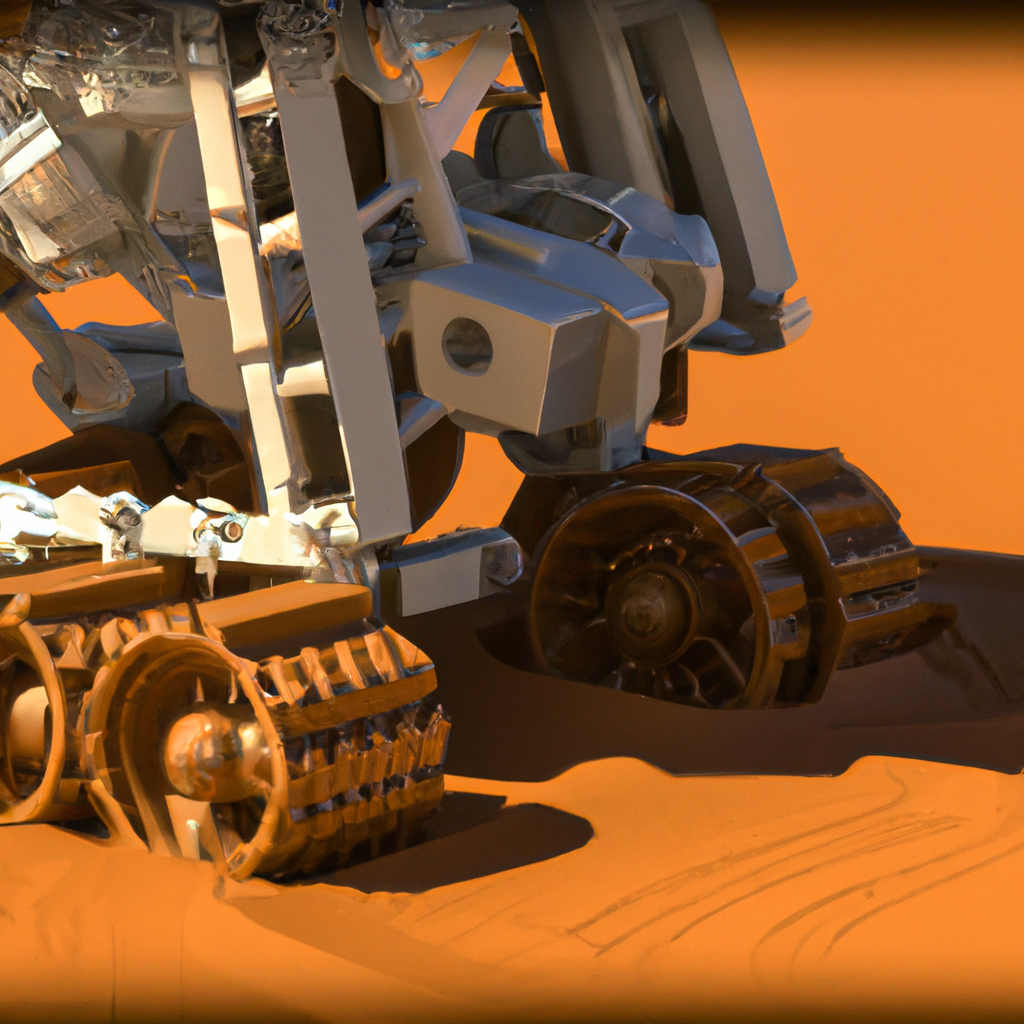

In [35]:
from IPython.display import Image

local_image = blogger.artist.save_image(url=image_url, description=image_description, folder='generated')
post.set_feature_image(local_image)
Image(filename='generated/' + local_image)

### Publish
Final step in our authoring flow is to generate the blog post as HTML. Note that for Auto-Demo we have attempted to keep the text and features of the blog post minimal to avoid a scrolling output. Some of the styles of the generated HTML conflict with the Jupyter Notebook styles so the notebook rendered HTML may not look same as browser rendered.

> This last step is somewhat magical in the Auto-Demo mode. Re-run the notebook a few times to see that no two blog posts are exactly the same, ever!

Our final step is to generate a local copy of HTML and Markdown formats of the blog post so that we can integrate this will our blog system of choice.

NOTE: When rendering the HTML in Jupyter notebook the image won't show up as it looks for a local copy of the image instead of resolving to the `generated` folder. View the generated HTML in brower to see the complete post with image.

In [36]:
from IPython.core.display import HTML
post_html = blogger.generate_html(post)
HTML(post_html)

In [38]:
html_path, markdown_path = blogger.publish(post_html=post_html, 
                                           filename=post.get_keywords().replace(' ', '').replace(',', '-'), 
                                           folder='generated')
print(html_path, markdown_path)

Mars-Earth-Travel-20230210164407.html Mars-Earth-Travel-20230210164407.md
